# White noise and random walk

A random walk can intuitively be viewed as the integral of white noise 

$W(t) = \int_0^t N(t) dt$

Unfortunately life is not so simple. To see why consider the following. For discrete time processes, white noise $N_i$ (time-index $t=i \Delta t$) works wonderfully. Let's start with $N_i$ has a normal distribution with expected value 0 and variance 1, i.e. the margninal probability $f_{N_i}$ for $N_i$ is:

$f_{N_i}(x)= \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}$

with indepenent variables for each discrete time, thus $E N_i N_j = 0$ for $i<>j$. Now consider a discrete random walk as:

$W_i = \sum_{k=1}^{i} N_i$ for $i \ge 0$

Clearly, we have $E W_i=0$ and $E W_i^2=i$

__let's see this in action__

In [42]:
# import some useful packages first
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn #random number generator for normal or gaussian distributed variables.
from math import * #basic math functions

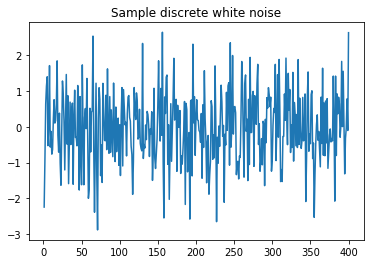

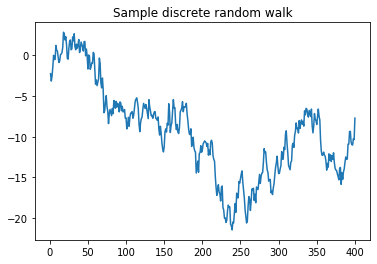

In [33]:
n=400 #length of series
i_all = np.arange(n)+1 #[1,...,n] Note that python is zero base for indexing
N_i = randn(n) 
W_i = np.cumsum(N_i)

# now plot
plt.plot(i_all,N_i)
plt.title("Sample discrete white noise")
plt.show()

plt.plot(i_all,W_i)
plt.title("Sample discrete random walk")
plt.show()
# re-run to see some possible results

Now let's check the statistics, by generating many samples and computing mean and variance.

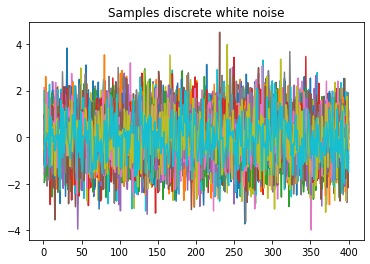

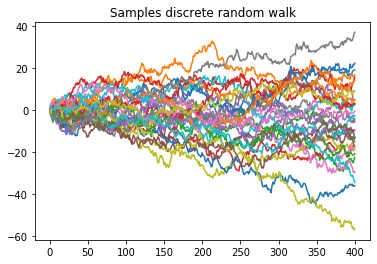

In [34]:
n=400 #length of series 
s=30 # number of samples
i_all = np.arange(n)+1 #[1,...,n] Note that python is zero base for indexing
N_i = randn(n,s) 
W_i = np.cumsum(N_i,axis=0) 

# first plot the series
plt.plot(i_all,N_i)
plt.title("Samples discrete white noise")
plt.show()

plt.plot(i_all,W_i)
plt.title("Samples discrete random walk")
plt.show()
# re-run to see that the sample statistics are reasonable stable for large sample sizes $s$

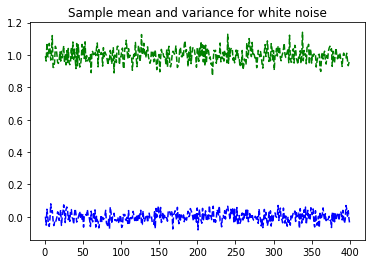

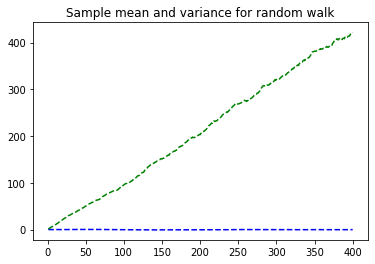

In [39]:
n=400 #length of series 
s=1000 # number of samples
i_all = np.arange(n)+1 #[1,...,n] Note that python is zero base for indexing
N_i = randn(n,s) 
W_i = np.cumsum(N_i,axis=0)

# compute and plot some statistics
mean_N_i = np.mean(N_i,axis=1)
std_N_i  = np.std(N_i,axis=1)

mean_W_i = np.mean(W_i,axis=1)
std_W_i  = np.std(W_i,axis=1)

# first plot the series
plt.plot(i_all,mean_N_i,'b--')
plt.plot(i_all,std_N_i**2,'g--')
plt.title("Sample mean and variance for white noise")
plt.show()

plt.plot(i_all,mean_W_i,'b--')
plt.plot(i_all,std_W_i**2,'g--')
plt.title("Sample mean and variance for random walk")
plt.show()
# re-run and play with sample size s 

## Continuous time problems 

So, with a discrete time white noise and summed random walk all seems to well. But now. let's consider what happens in continuous time. To illustrate the kind of problems that appear, consier first a discrete series with time-step $\Delta t$. The previous example can be viewed as the case where $\Delta t=1$.

$W_i = \sum_{k=1}^{i} N_i$ for $i \ge 0$

with $t=i \Delta t$ and $\alpha$ an additional scaling factor compared to the previous example. Clearly the mean $E W_i=0$ and the variance now becomes 

$E W_i^2 = i \alpha^2$

If we want to have a variance that converges to $t=i \Delta t$, then we need to set $\alpha^2=\Delta t$, or

$\alpha = \sqrt{\Delta t}$

Resulting in

$W_{t/{\Delta t}} = \sum_{k=1}^{t/{\Delta t}}  N_i \sqrt{\Delta t}$

This resembles the Riemann sum that we normally use for integrals, but now with $\sqrt{\Delta t}$ instead of $\Delta t$ in the summation. Let's see if we can fix this by scaling of $N_i$.

Let $n_i = 1/\sqrt{\Delta t} N_i$ then

$W_{t/{\Delta t}} = \sum_{k=1}^{t/{\Delta t}}  n_i {\Delta t}$

This may seem okay at first sight, but this implies that the slope of $W_{t/{\Delta t}}$ will on average grow without bound at $\Delta t$ becomes smaller. And in the limit thie variance of $n(t)$ will become infinite and $W(t)$ will not be differentiable. In a more formal mathematical sense, we cannot define a continuous time white noise process directly. We can define a random walk process as the limit of a discrete process, but it will not be differentiable.

Let's see this in action numerically:

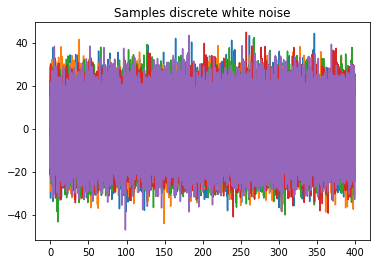

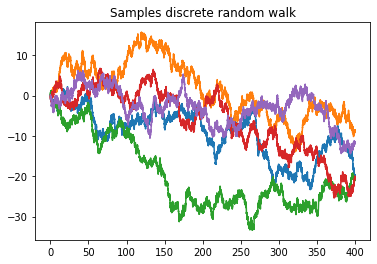

In [47]:
L=400
dt=0.01 #1.0 # dt=1 should be equivalent to previous case, consider decreasing dt (\Delta t in formulas above)
s=5 # number of samples
t_all = np.arange(dt,L,dt) #[dt,2*dt,...,L] 
n=len(t_all)
n_i = (1.0/sqrt(dt))*randn(n,s) 
W_i = np.cumsum(dt*n_i,axis=0) 

# first plot the series
plt.plot(t_all,n_i)
plt.title("Samples discrete white noise")
plt.show()

plt.plot(t_all,W_i)
plt.title("Samples discrete random walk")
plt.show()
# re-run to see what happens if you decrease dt from 1.0 to 0.1 to 0.01

## Solution continuous time random-walk

Above we saw that white noise does not converge properly for decreasing time-steps to a continuous-time process. Therefore, we start with a definition of the random walk instead. A disadvantage is of course that one needs a new definition for time integration (the Ito integral), but that's the topic of a next notebook.

Let's define a continuous-time stochastic random-walk process $W(t)$ as:

- $E W(t)=0$
- $W(0)=0$
- $E ( W(t)-W(s) )( W(u)-W(t) )=0 ; s \le t \le u$
- $E ( W(t)-W(s) )^2 = t-s$
- Each marginal distribution is Gaussian

It may not be obvious at once, but this completely defines the distribution for each vector $W(t_1),\ldots,W(t_q)$, and through that the full process. To illustrate this, consider the distribution of 
$W(0),W(\Delta t),W(2 \Delta t),W(3 \Delta t)$.

- $W(0)=0$
- $E W(\Delta t)=0$ and $E W({\Delta t}^2)=\Delta t$ and $W(Delta t)$ is Gausian.

Now consider $N_1=W(\Delta t)-W(0)$ and $N_2=W(2 \Delta t)-W(\Delta t)$. Now, from the above:

- $N_1 ~ N(0,\sqrt{\Delta t})$ i.e. a normal distribution with mean 0 and variance $\Delta t$.
- $N_2 ~ N(0,\sqrt{\Delta t})$
- $E N_1 N_2 = 0$, i.e. independent increments.

Thus at the discrete level we still can still use independent inrements to generate samples for the random walk, like with white noise in the discrete case.

## Discretization of the continuous-time random walk

Now that we start from a continuous-time process, we need a discretization for use on a computer. Using the independent increments we can quickly and easily generate samples with the correct distribution, i.e. without approximation errors that are common for time-discretization. The method stays the same as above:

- first generate the first point
- then the increments
- finally sum the increments.

One can generate series at arbitrary resolution, but if one generates two samples with different resolution, then these are normally not comparable because they represent different samples. Thus this approach does not work for studying convergence for individual samples, but it does work for studying the statistics.

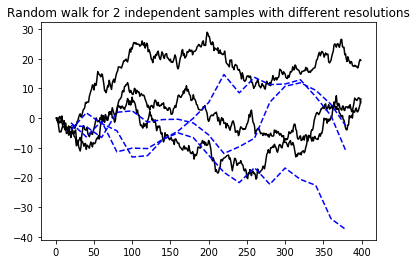

In [52]:
L=400
dt_1=1.0 #1.0 # dt=1 should be equivalent to previous case, consider decreasing dt (\Delta t in formulas above)
dt_2=20.0
s=3 # number of samples
t_all_1 = np.arange(dt_1,L,dt_1) 
t_all_2 = np.arange(dt_2,L,dt_2) 
n_1=len(t_all_1)
n_2=len(t_all_2)
N_i_1 = sqrt(dt_1)*randn(n_1,s) 
N_i_2 = sqrt(dt_2)*randn(n_2,s) 
W_i_1 = np.cumsum(N_i_1,axis=0) 
W_i_2 = np.cumsum(N_i_2,axis=0) 

plt.plot(t_all_1,W_i_1,'k-')
plt.plot(t_all_2,W_i_2,'b--')
plt.title("Random walk for 2 independent samples with different resolutions")
plt.show()


## Different time-resolutions from the same samples

Going from small time-steps to coarser time-steps is easy just remove the times that you do not need anymore. If the time-steps are not multiples, eg $\Delta t_1=h$, $\Delta t_1=3/2  h$, then you can start with the set union of all times ($h,3/2 h, 2 h,3 h,\ldots$ and select the relevant subsets.

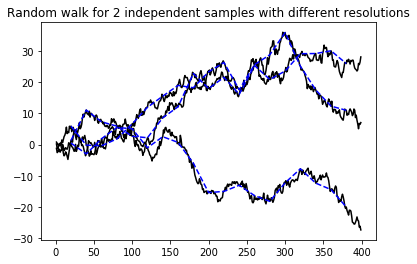

In [53]:
L=400
dt_1=1.0 #1.0 # dt=1 should be equivalent to previous case, consider decreasing dt (\Delta t in formulas above)
f=20 #coarsening factor
s=3 # number of samples
t_all_1 = np.arange(dt_1,L,dt_1) 
t_all_2 = t_all_1[(f-1)::f] 
n_1=len(t_all_1)
n_2=len(t_all_2)
N_i_1 = sqrt(dt_1)*randn(n_1,s) 
W_i_1 = np.cumsum(N_i_1,axis=0) 
W_i_2 = W_i_1[(f-1)::f]

plt.plot(t_all_1,W_i_1,'k-')
plt.plot(t_all_2,W_i_2,'b--')
plt.title("Random walk for 2 independent samples with different resolutions")
plt.show()
